# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [2]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
TF_ENABLE_GPU_GARBAGE_COLLECTION=True

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


#### Load Image Data

In [3]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.001 # start off with high rate first 0.001 and experiment with reducing it gradually 

print("done")

done


#### Generate Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


C:\Users\bober\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [5]:
VGG16 = tf.keras.applications.VGG16(include_top=False, input_shape=(224,224,3), weights="imagenet")
# VGG19 = tf.keras.applications.VGG19(include_top=False, input_shape=(224,224,3), weights="imagenet")
# ResNet152V2 = tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), weights="imagenet")

model = tf.keras.models.Sequential([
        
        VGG16,
#         VGG19,
#         ResNet152V2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu', name='dense_feature'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# build the model
model.build(input_shape=(None, 224, 224))

# compiling the model
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=LEARNING_RATE, rho=0.95, epsilon=1e-07),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
____________________________________________

#### [5 points] Train Model

In [6]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# raise NotImplementedError("Use the model.fit function to train your network")

history = model.fit(train_batches,  
                    epochs=NUM_EPOCHS, 
                    verbose=2, 
                    validation_data=valid_batches, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_steps=STEP_SIZE_VALID
                   )

11
3


C:\Users\bober\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bober\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40


C:\Users\bober\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5094: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


10/10 - 19s - loss: 0.8076 - accuracy: 0.5532 - val_loss: 0.6711 - val_accuracy: 0.5500
Epoch 2/40
10/10 - 4s - loss: 0.7648 - accuracy: 0.4894 - val_loss: 0.6694 - val_accuracy: 0.5000
Epoch 3/40
10/10 - 4s - loss: 0.8169 - accuracy: 0.4894 - val_loss: 0.6718 - val_accuracy: 0.5500
Epoch 4/40
10/10 - 4s - loss: 0.8320 - accuracy: 0.3723 - val_loss: 0.6738 - val_accuracy: 0.5000
Epoch 5/40
10/10 - 4s - loss: 0.7738 - accuracy: 0.5213 - val_loss: 0.7130 - val_accuracy: 0.4000
Epoch 6/40
10/10 - 4s - loss: 0.7559 - accuracy: 0.5426 - val_loss: 0.6655 - val_accuracy: 0.6000
Epoch 7/40
10/10 - 4s - loss: 0.6804 - accuracy: 0.6170 - val_loss: 0.5886 - val_accuracy: 0.8000
Epoch 8/40
10/10 - 4s - loss: 0.7347 - accuracy: 0.5532 - val_loss: 0.5815 - val_accuracy: 0.8000
Epoch 9/40
10/10 - 4s - loss: 0.6984 - accuracy: 0.6000 - val_loss: 0.6166 - val_accuracy: 0.7500
Epoch 10/40
10/10 - 4s - loss: 0.7244 - accuracy: 0.5400 - val_loss: 0.5587 - val_accuracy: 0.7500
Epoch 11/40
10/10 - 4s - loss

#### [5 points] Plot Accuracy and Loss During Training

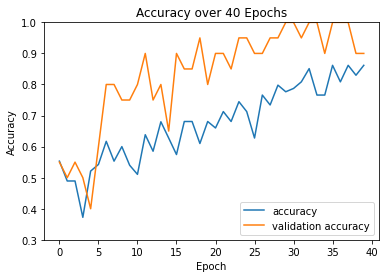

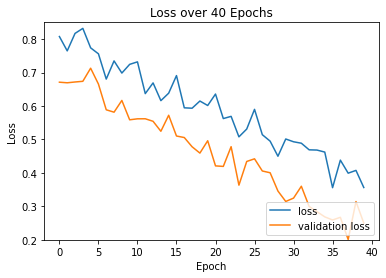

In [10]:
import matplotlib.pyplot as plt

# raise NotImplementedError("Plot the accuracy and the loss during training")

# plot for the Acurracy vs Epochs
plt.title('Accuracy over 40 Epochs')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()

# plot for the Loss vs Epochs
plt.title('Loss over 40 Epochs')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.2, .85])
plt.legend(loc='lower right')
plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.
 2/18 [==>...........................] - ETA: 1s

C:\Users\bober\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1937: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


18/18 [==============================] - 1s 31ms/step
covid\nejmoa2001191_f3-PA.jpeg


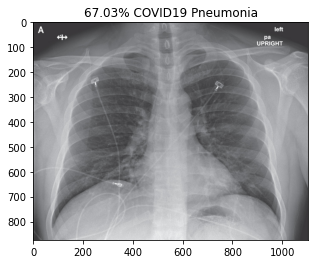

covid\nejmoa2001191_f4.jpeg


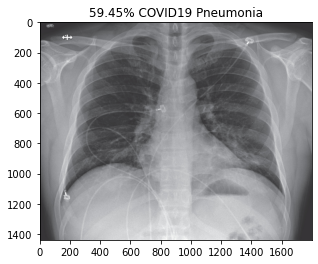

covid\nejmoa2001191_f5-PA.jpeg


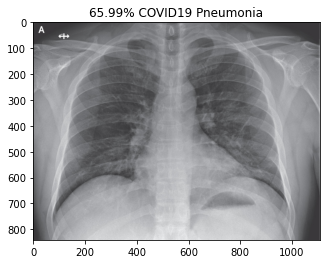

covid\radiol.2020200490.fig3.jpeg


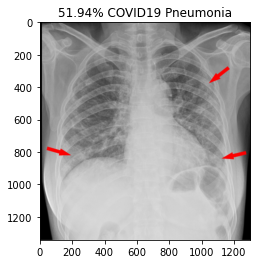

covid\ryct.2020200028.fig1a.jpeg


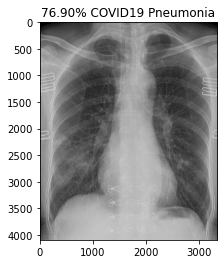

covid\ryct.2020200034.fig2.jpeg


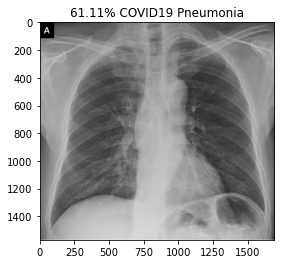

covid\ryct.2020200034.fig5-day0.jpeg


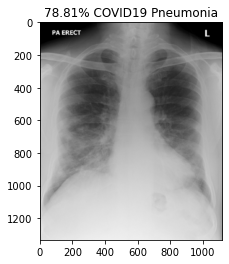

covid\ryct.2020200034.fig5-day4.jpeg


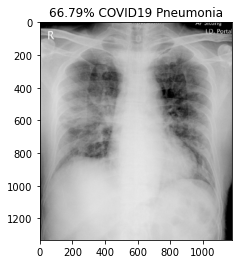

covid\ryct.2020200034.fig5-day7.jpeg


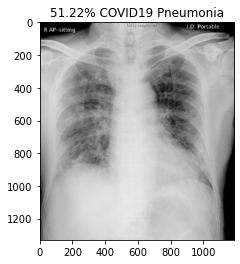

normal\NORMAL2-IM-1385-0001.jpeg


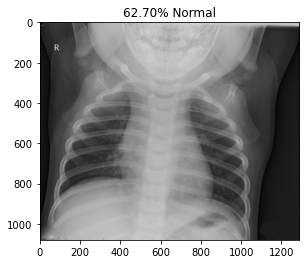

normal\NORMAL2-IM-1396-0001.jpeg


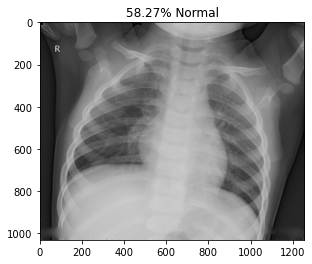

normal\NORMAL2-IM-1400-0001.jpeg


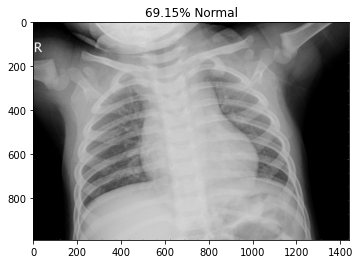

normal\NORMAL2-IM-1401-0001.jpeg


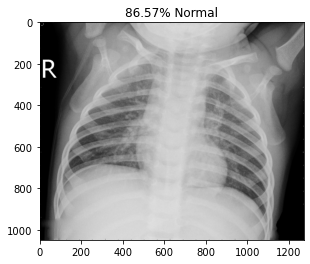

normal\NORMAL2-IM-1406-0001.jpeg


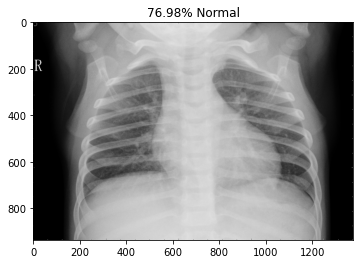

normal\NORMAL2-IM-1412-0001.jpeg


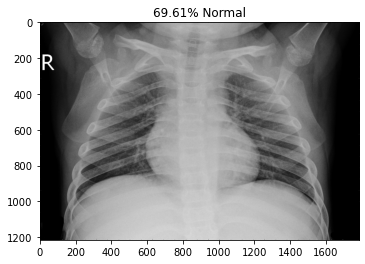

normal\NORMAL2-IM-1419-0001.jpeg


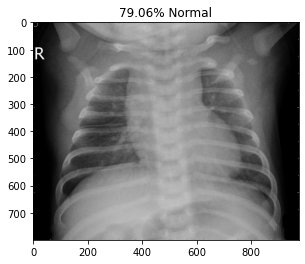

normal\NORMAL2-IM-1422-0001.jpeg


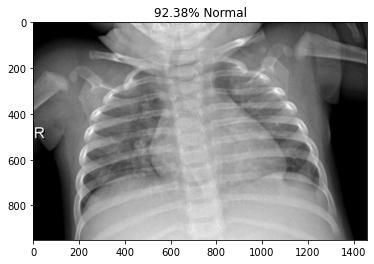

normal\NORMAL2-IM-1423-0001.jpeg


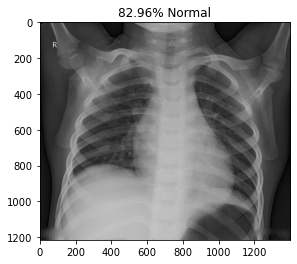

In [11]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])   

    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.


C:\Users\bober\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1937: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


130/130 [==============================] - 3s 24ms/step


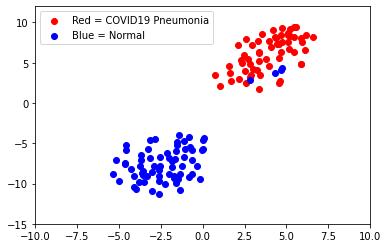

In [14]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the two classes.")


labels = []

# for x in range(len(tsne_data_generator)):
#     labels += tsne_data_generator[x][1]

for x in range(len(tsne_data_generator)):
    if tsne_data_generator[x][1] == [0.]:
        labels += ['red']
    elif tsne_data_generator[x][1] == [1.]:
        labels += ['blue']

pred_intermediate = intermediate_layer_model.predict_generator(tsne_data_generator,130,verbose=1)

    
features = TSNE(n_components=2).fit_transform(pred_intermediate)
features_sub1 = features[:,0]
# print(features_sub1)
features_sub2 = features[:,1]
# print(features_sub2)

covid_x = []
covid_y = []

norm_x = []
norm_y = []

for i in range(len(features_sub1)):
    if labels[i] == 'red':
        covid_x += [features_sub1[i]]
        covid_y += [features_sub2[i]]
    if labels[i] == 'blue':
        norm_x += [features_sub1[i]]
        norm_y += [features_sub2[i]]
    
# print(features)
plt.scatter(covid_x, covid_y, c='red')
plt.scatter(norm_x, norm_y, c='blue')
plt.ylim([-15, 12])
plt.xlim([-10, 10])
# plt.legend()
plt.legend(labels=('Red = COVID19 Pneumonia', 'Blue = Normal'), loc='upper left')
# plt.legend(['Blue = COVID19 Pneumonia'], loc='upper left')      
            
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->